<h1 align='center'> Breast Cancer Detection <h1>

Breast Cancer atau kanker payudara merupakan sebuah kanker yang terbentuk di jaringan payudara yang terjadi ketika sel-sel pada jaringan yang ada di payudara tumbuh tidak terkendali dan mengambil alih jaringan payudara yang sehat dan sekitarnya

Ciri - ciri dari Breast cancer ini telah ditemukan dengan menggunakan gambar digital masa payudara Fine Needle Aspirate (FNA) yang bertujuan untuk investigasi diagnosa adanya gumpalan atau tidak. Mereka mendeskripsikan karakteristik inti cell pada sebuah gambar dengan 2 klasifikasi diagnosa yaitu malignant (M) dan Benign (B). Dengan ciri ciri yang sudah dideskripsikan tersebut kita akan membuat sebuah model machine learning yang dapat mengklasifikasikan apakah kanker payudara itu ganas atau jinak berdasarkan ciri karakteristik inti cellnya

Tujuan akhir dalam project ini adalah membuat model machine learning yang dapat mengklasifikasikan diagnosa dari kanker payudara dengan akurasi yang sebaik mungkin 

Batasan dalam project ini sebagai berikut:
   1. Data yang digunakan merupakan ciri karakteristik kanker payudara
   2. Data diperoleh dari kaggle.com
   3. goal = menemukan 1 model machine learning dengan akurasi terbaik untuk klasifikasi kanker payudara

Berikut merupakan langkah-langkah dalam mengidentifikasi kangker payudara:
1. Data understanding
2. Data Preprocessing
3. Bulding model and using grid search to find the best parameters
4. Final model
5. Predicting single observation
6. Conclution

## 1. Data understanding 

### Importing library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import joblib

### Importing the data

data yang digunakan dapat didownload pada : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [2]:
data = pd.read_csv('Breast_Cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data exploration

Dalam dataset tersebut yang bertindak sebagai kolom target adalah diagnosis dengan 2 nilai yaitu M dan B dengen tipe data object atau categorical data

Ukuran data set tersebut berjumlah 569 data dengan kolom sebanyak 33 (termasuk kolom id dan diagnosis), features untuk menentukan apakah sebuah data termasuk dalam jenis kanker ganas atau jinak berjumlah 31 features data dengan tipe data numerik

In [4]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
data.shape

(569, 33)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

informasi diatas berisikan informasi singkat mengenai jumlah kolom, nama kolom, tipe data kolom, dan jumlang null value pada setiap kolom. Pada kolom dengan nama "Unnamed: 32" yang berindex 32 memiliki nilai null untuk semua data, untuk kita akan menghapus kolom tersebut pada tahap preprocessing data nantinya.

### Numerical Data Exploration

Explorasi pada data numerik ini, kita akan melihat detail statistik untuk setiap kolom numerik seperti jumlah data, nilai rata-rata, min max, quartil, dan standar deviasi nya.

#### Statistical Summary

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Categorical Data Exploration

Dikarenakan data kategori dalam data set ini hanya 1 yaitu pada kolom diagnosis, untuk itu kita akan melihat jumlah untuk setiap nilainya pada kolom kategori menggunakan chart.

c:\users\17523220\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

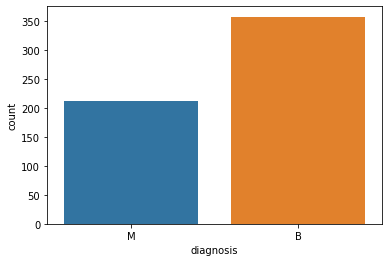

In [8]:
sns.countplot(data['diagnosis'],label='Count')

variable target yaitu diagnosis memiliki jumlah yang unbalanced atau tidak seimbang dengan jumlah Malignant (M) yaitu 200 dan jumlah benign (B) 350 data

## 2. Data Preprocessing

### Dealing with the missing values

saat explorasi data kita menemukan adanya missing value dalam dataset, untuk itu kita akan mencoba mencari lebih dalam dan mengatasi missing value pada data set.

#### Identify missing values

In [9]:
data.isnull().all()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [10]:
data.isnull().values.sum()

569

In [11]:
data.columns[data.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

kita menemukan adanya missing value dengan jumlah 569 data pada index kolom "Unnamed: 32". dikarenakan semua nilai dalam kolom tersebut adalah null, untuk itu kita akan mengahapus kolom "Unnamed: 32".

#### Droping column that have missing values

In [12]:
data = data.drop(columns='Unnamed: 32')

In [13]:
data.isnull().values.sum()

0

#### Droping column id

kita akan menghapus kolom id dari tabel, dikarenkan kolom id hanyalah sebuah index dari sebuah baris data dan tidak digunakan untuk mengklasifikasi diagnosa kanker

In [14]:
data = data.drop(columns='id')

### Dealing with Categorical Data

In [15]:
data.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [16]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Data kategori pada data set ini adalah kolom "diagnosis" yang mana kolom tersebut merupakan dependent variable atau variabel target dengan unique value yaitu M dan B. Kita akan mengubah data kategori menjadi data numerik dengan pendekatan one hot encoding

#### One Hot Encoding

In [17]:
data = pd.get_dummies(data=data, drop_first=True)

In [18]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Correlation for each features in dataset

korelasi merupakan sebuah ukuran hubungan timbal balik antara dua variabel dimana apakah itu kausal atau tidak, korealsi berguna karena dapat menunjukan hubungan prediktif antara 2 variable. Namun sebagian waktu korelasi tidak dapat menyiratkan sebab-akibat apapun.

#### Correlation Matrix

In [19]:
corr = data.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


Untuk mempermudah melihat hubungan antara variable dependent dan independend, kami membuat barchart dan heatmap yang merepresentasikan hubungan antara 2 variabel

#### Correlation Features with Barchart

In [20]:
data_copy = data.copy()
dependent_data = data_copy['diagnosis_M']
independent_data = data_copy.drop(columns='diagnosis_M')

<AxesSubplot:title={'center':'Correlated with Diagnosis_M'}>

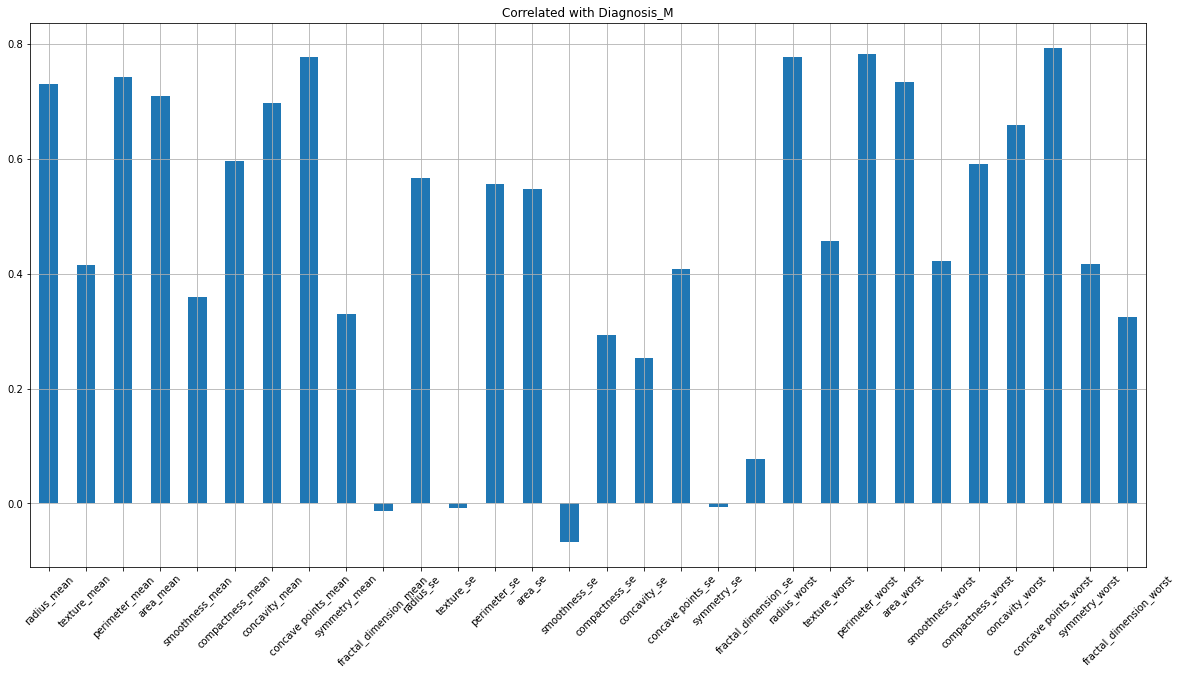

In [21]:
independent_data.corrwith(dependent_data).plot.bar(figsize=(20,10),
                                                  title='Correlated with Diagnosis_M',
                                                  rot=45,
                                                  grid=True)

#### Correlation Features with Heatmap

<AxesSubplot:title={'center':'Correalated with Diagnosis_M'}>

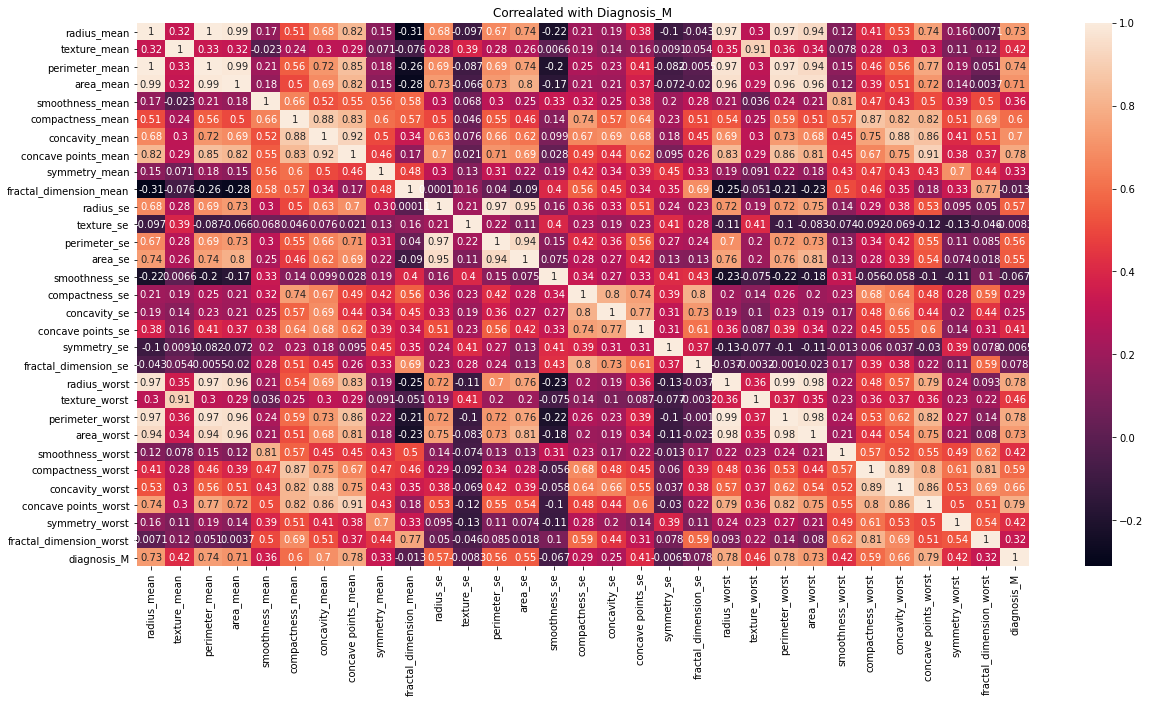

In [22]:
plt.figure(figsize=(20,10))
plt.title("Correalated with Diagnosis_M")
sns.heatmap(corr,annot=True)

dari hasil ploting nilai korelasi setiap variabel, kami mengidentifikasi adanya features yang memiliki nilai korelasi yang lemah dengan varibel target yaitu :
1. symmetry_mean
2. texture_se
3. smoothness_se
4. concave points_se
5. fractal_dimensions_se

### Spliting the dataset train and test set

In [23]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [24]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

### Features Selection

Features selection adalah sebuah metode untuk mengurangi variabel dengan menggunakan kriteria tertentu untuk memilih variabel mana yang paling berguna untuk memprediksi target pada model

Sebelumnya kita sudah mengidentifikasi variabel independent yang akan kita hilangkan berdasarkan nilai korelasinya, tetapi kita perlu mengidentifikasinya lebih dalam lagi dengan menggunakan metode K-Best untuk memastikan variabel variable mana yang diperlukan untuk mengklasifikasi kanker payudara

In [25]:
from sklearn.feature_selection import SelectKBest,f_classif

In [26]:
selectorK = SelectKBest(score_func=f_classif,k=27)
x_k = selectorK.fit(x,y)

In [27]:
f_score = selectorK.scores_
p_value = selectorK.pvalues_

In [28]:
columns = list(x.columns)
print("")
print("")
print("  Feature        ","        F-Score    ","P-Values")
print("  -------        ", "        -------    ","--------")

for i in range(0,len(columns)):
    f1 = "%4.2f" % f_score[i]
    p1 = "%2.6f" % p_value[i]
    print(" ", columns[i].ljust(22), f1.rjust(9), p1.rjust(12))

cols = selectorK.get_support(indices=True)
selectedCols = x.columns[cols].to_list()
non_selectedCols = x.drop(columns=selectedCols).columns
print("kolom yang akan dihilangkan = ",non_selectedCols)



  Feature                 F-Score     P-Values
  -------                 -------     --------
  radius_mean               646.98     0.000000
  texture_mean              118.10     0.000000
  perimeter_mean            697.24     0.000000
  area_mean                 573.06     0.000000
  smoothness_mean            83.65     0.000000
  compactness_mean          313.23     0.000000
  concavity_mean            533.79     0.000000
  concave points_mean       861.68     0.000000
  symmetry_mean              69.53     0.000000
  fractal_dimension_mean      0.09     0.759937
  radius_se                 268.84     0.000000
  texture_se                  0.04     0.843332
  perimeter_se              253.90     0.000000
  area_se                   243.65     0.000000
  smoothness_se               2.56     0.110297
  compactness_se             53.25     0.000000
  concavity_se               39.01     0.000000
  concave points_se         113.26     0.000000
  symmetry_se                 0.02     0

Berdasarkan hasil diatas, kita hanya akan menghilangkan 3 kolom yaitu 'fractal_dimension_mean', 'texture_se', dan 'symmetry_se'. kolom tersebut memiliki f-score < p_value yang artinya menyetujui null hypotesis(variabel tidak memiliki korelasi)

In [29]:
x_selected = x[selectedCols]
x_selected.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Feature Scalling

Nilai pada varible independent bertipe data numerik memiliki rentang nilai yang bervariasi, untuk itu kita akan melakukan Feature scaling yang mana feature scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. kita akan menggunakan Standarisation untuk feature scaling.

In [30]:
sc = StandardScaler()
x_scaled = pd.DataFrame(sc.fit_transform(x_selected),columns=[selectedCols])

In [31]:
x_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.489734,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,0.499255,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,1.228676,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,0.326373,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,1.270543,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Spliting Data Train and Test set

membagi data set kedalam train set dan test set, yang akan digunakan untuk melatih model dan evaluasi model. pembagian data ini menggunakan rasio 80:20 dengan 80% train set dan 20% test set yang pembagian tingkatnya berdasarkan variable target.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2, random_state=0, stratify=y)

In [33]:
y_train

381    0
144    0
136    0
116    0
567    1
      ..
145    0
244    1
301    0
314    0
396    0
Name: diagnosis_M, Length: 455, dtype: uint8

## 3. Building the models

model yang akan digunakan untuk mengklasifikasi diagnosis kanker payudara adalah Logistic Regression, Random Forest Classifier, dan Support Vector Machine. Ketiga model tersebut akan dilatih menggunakan train set yang sudah kita bagi sebelumnya, lalu melakukan hyperparameter tunning pada ketiga model untuk mendapatkan the best parameter dengan akurasi terbaik. Tahap terakhir yaitu mengevaluasi dengan membandingkan hasil yang diperoleh dari ketiga model tersebut.

### a) Logistic regression

#### Build logistic regression model

In [34]:
logistic = LogisticRegression(random_state=10)

#### Setting the parameter

In [35]:
logistic_param = {'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
                 'penalty':['l2'],
                 'solver':['lbfgs', 'liblinear', 'sag']}

In [36]:
logistic_param

{'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
 'penalty': ['l2'],
 'solver': ['lbfgs', 'liblinear', 'sag']}

#### Using Grid Search to find the best parameter

In [37]:
logistic_grid = GridSearchCV(estimator=logistic,
                            param_grid=logistic_param,
                            scoring='accuracy',
                            cv=10,
                            n_jobs=-1,
                            return_train_score=True)

In [38]:
logistic_grid_fit = logistic_grid.fit(x_train,y_train)

In [39]:
logistic_result = pd.DataFrame.from_dict(logistic_grid_fit.cv_results_)

#### Testing model using the best parameter

In [40]:
logistic_grid_fit.best_params_

{'C': 0.75, 'penalty': 'l2', 'solver': 'lbfgs'}

In [41]:
logistic_final = LogisticRegression(C=0.75,penalty='l2',solver='lbfgs')
logistic_final.fit(x_train,y_train)

LogisticRegression(C=0.75)

In [42]:
logistic_y_pred = logistic_final.predict(x_test)

In [43]:
logistic_acc = accuracy_score(y_test,logistic_y_pred)
logistic_f1 = f1_score(y_test,logistic_y_pred)
logistic_prec = precision_score(y_test,logistic_y_pred)
logistic_recall = recall_score(y_test,logistic_y_pred)

### b) Random Forest Classifier

#### Build Random forest classifier model

In [44]:
rfc = RandomForestClassifier(random_state=10)

#### Setting the parameters

In [45]:
rfc_param = {'n_estimators':[5,10,15,20],
            'min_samples_split':[8,13,16],
            'min_samples_leaf':[1,2,3,4,5],
            'max_depth':[2,4,6]
            }

#### Using Grid Search to find the best parameters

In [46]:
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid=rfc_param,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1,
                       return_train_score=True)

In [47]:
rfc_grid_fit = rfc_grid.fit(x_train,y_train)

In [48]:
rfc_result = pd.DataFrame.from_dict(rfc_grid_fit.cv_results_)

#### Testing model using the best parameter

In [49]:
rfc_grid_fit.best_params_

{'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 20}

In [50]:
rfc_final = RandomForestClassifier(max_depth= 6,min_samples_leaf= 2,min_samples_split= 8,n_estimators= 20)

In [51]:
rfc_final.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=20)

In [52]:
rfc_y_pred = rfc_final.predict(x_test)

In [53]:
rfc_acc = accuracy_score(y_test,rfc_y_pred)
rfc_f1 = f1_score(y_test,rfc_y_pred)
rfc_prec = precision_score(y_test,rfc_y_pred)
rfc_recall = recall_score(y_test,rfc_y_pred)

### c) Support Vector Machine

#### Build Support vector machine model

In [54]:
svm = SVC(random_state=10)

#### Setting the parameters

In [55]:
svm_param = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10],
            'kernel':['rbf','linear'],
            'gamma':[0.1, 0.25, 0.5, 1, 2, 5, 10]}

#### Using Grid Search to find the best parameters

In [56]:
svm_grid = GridSearchCV(estimator=svm,
                       param_grid=svm_param,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1,
                       return_train_score=True)

In [57]:
svm_grid_fit = svm_grid.fit(x_train,y_train)

In [58]:
svm_result = pd.DataFrame.from_dict(svm_grid_fit.cv_results_)

#### Testing model using the best parameter

In [59]:
svm_grid_fit.best_params_

{'C': 2, 'gamma': 0.1, 'kernel': 'linear'}

In [60]:
svm_final = SVC(C= 2, gamma= 0.1, kernel='linear')

In [61]:
svm_final.fit(x_train,y_train)

SVC(C=2, gamma=0.1, kernel='linear')

In [62]:
svm_y_pred = svm_final.predict(x_test)

In [63]:
svm_acc = accuracy_score(y_test,svm_y_pred)
svm_f1 = f1_score(y_test,svm_y_pred)
svm_prec = precision_score(y_test,svm_y_pred)
svm_recall = recall_score(y_test,svm_y_pred)

### Compare Result

Dalam membandingkan model mana yang memiliki nilai akurasi terbaik, mengingat jumlah varibale target yang tidak seimbang kita juga akan menggunakan F1-Score sebagai salah satu kriteria memilih model terbaik

In [64]:
logistic_top_rank = logistic_result[logistic_result['rank_test_score']==1]
rfc_top_rank = rfc_result[rfc_result['rank_test_score']==1]
svm_top_rank = svm_result[svm_result['rank_test_score']==1]

In [65]:
df_dict = {'model':['Logistic Regression','Random Forest','Support Vector'],
           'Mean Test Score':[logistic_top_rank['mean_test_score'].mean(),
                             rfc_top_rank['mean_test_score'].mean(),
                             svm_top_rank['mean_test_score'].mean()],
          'Mean train Score':[logistic_top_rank['mean_train_score'].mean(),
                             rfc_top_rank['mean_train_score'].mean(),
                             svm_top_rank['mean_train_score'].mean()],
          'Accuracy':[logistic_acc,rfc_acc,svm_acc],
          'F1-score':[logistic_f1,rfc_f1,svm_f1],
          'Precision':[logistic_prec,rfc_prec,svm_prec],
          'Recall':[logistic_recall,rfc_recall,svm_recall]}

In [66]:
result_df = pd.DataFrame(df_dict)

In [67]:
result_df

,model,Mean Test Score,Mean train Score,Accuracy,F1-score,Precision,Recall
0,Logistic Regression,0.986812,0.991942,0.964912,0.952381,0.952381,0.952381
1,Random Forest,0.964928,0.990720,0.929825,0.906977,0.886364,0.928571
2,Support Vector,0.980145,0.992918,0.938596,0.913580,0.948718,0.880952


Berdasarkan hasil yang diperoleh seperti pada tabel diatas, kita akan memilih model linear regression untuk mengklasifikasi diagnosa kanker payudara, karena linear regression memiliki nilai akurasi dan F1-Score terbaik yaitu akururasi dengan nilai 96,49% dan nilai f1-score sebesar 95,23%.

Tetapi untuk keseluruhan model mempunyai nilai akurasi yang sangat baik dimna semuanya bernilai diatas 90% yang mana nilai sebesar itu sangatlah baik untuk klasifikasi diagnosa kanker payudara.

## 4. Final Model

sesuai hasil training dan testing model, kita akan menggunakan logistic regression sebagai model untuk klasifikasi diagnosa kanker payudara

#### Saving used features 

In [68]:
joblib.dump(selectedCols,'features_list.pkl')
selectedCols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

#### Saving the best parameter of Logistic Regession

In [69]:
parameters = logistic_grid_fit.best_params_
parameters

{'C': 0.75, 'penalty': 'l2', 'solver': 'lbfgs'}

In [70]:
joblib.dump(parameters,'lr_param.pkl')

['lr_param.pkl']

#### Saving the logistic regression model

In [71]:
joblib.dump(logistic_final,'lr_model.pkl')

['lr_model.pkl']

## 5. Predicting single observation

#### Load model and list of features

In [72]:
features = joblib.load('features_list.pkl')

In [73]:
model = joblib.load('lr_model.pkl')

In [74]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


#### Choose one index randomly

In [75]:
index = random.randint(0,len(data))
single_data = data.iloc[index,:]
single_data

radius_mean                 12.160000
texture_mean                18.030000
perimeter_mean              78.290000
area_mean                  455.300000
smoothness_mean              0.090870
compactness_mean             0.078380
concavity_mean               0.029160
concave points_mean          0.015270
symmetry_mean                0.146400
fractal_dimension_mean       0.062840
radius_se                    0.219400
texture_se                   1.190000
perimeter_se                 1.678000
area_se                     16.260000
smoothness_se                0.004911
compactness_se               0.016660
concavity_se                 0.013970
concave points_se            0.005161
symmetry_se                  0.014540
fractal_dimension_se         0.001858
radius_worst                13.340000
texture_worst               27.870000
perimeter_worst             88.830000
area_worst                 547.400000
smoothness_worst             0.120800
compactness_worst            0.227900
concavity_wo

#### Selecting features

In [81]:
actual_target = single_data['diagnosis_M']
features_data = single_data.loc[features].to_list()
if actual_target == 1:
    print("Actual target Diagonis of Breast Cancer : Malignant")
else:
    print("Actual target Diagonis of Breast Cancer : Benign")

Actual target Diagonis of Breast Cancer : Benign


#### Feature scaling

In [77]:
single_data_scaled = sc.transform([features_data])

#### Predicting Diagnosis

In [78]:
pred = model.predict(single_data_scaled)
if pred == 1:
    print("Diagonis of Breast Cancer is Malignant")
else:
    print("Diagonis of Breast Cancer is Benign")

Diagonis of Breast Cancer is Benign


## 6. Conclution

Kesimpulan yang didapat sebagai berikut:
- Pemodelan Machine Learning dapat memprediksi hasil diagnosa kanker payudara dengan menggunakan features dari hasil gambar digital massa payudara dengan sangat baik
- Model Machine learning terbaik yang digunakan untuk mendeteksi diagnosa kanker payudara adalah Logistic Regression
- Hasil akurasi dan F1-score akhir sangat baik yaitu akurasi dengan nilai 96,49% dan nilai F1-score sebesar 95,23%

Adapun file yang terlampir dari hasil project Breast Cancer Detection sebagai berikut:
1. features_list.pkl : daftar features yang digunakan untuk deteksi kanker payudara
2. lr_param.pkl : daftar parameters yang digunakan untuk pelatihan model logistic regression
3. lr_model.pkl : file model logistic regression hasil training yang siap digunakan.

<h1 align='center'> End <h1>